In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('StudentsPerformance.csv')

## Contexto

## Como estão distribuídas as notas em matemática? Existem muitos alunos com notas baixas?

In [9]:
media_matematica = df['math score'].mean()

print(f"A média de notas em matemática dos estudantes é de {media_matematica:.2f} pontos.")


A média de notas em matemática dos estudantes é de 66.09 pontos.


## Qual é a média de notas em matemática dos estudantes no conjunto de dados?


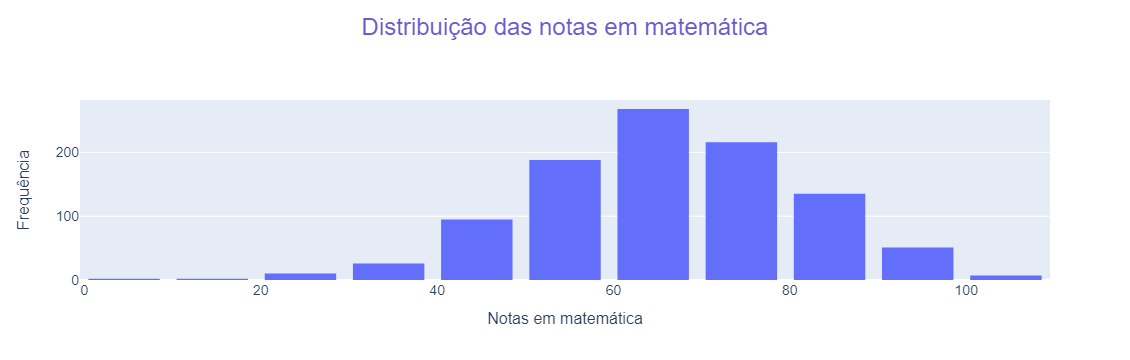

In [6]:
# Como estão distribuídas as notas em matemática? Existem muitos alunos com notas baixas?
fig = px.histogram(df, x='math score', nbins=20, labels={'math score': 'Notas em matemática', 'count': 'Frequência'},
                   title='Distribuição das notas em matemática')

fig.update_layout(
    title={
        'text': 'Distribuição das notas em matemática',
        'font': {
            'size': 24,
            'color': '#6A5ACD',
            'family': 'Arial'
        },
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': 'Notas em matemática',
        'title_font': {'size': 16, 'family': 'Arial'},
        'tickfont': {'size': 14, 'family': 'Arial'}
    },
    yaxis={
        'title': 'Frequência',
        'title_font': {'size': 16, 'family': 'Arial'},
        'tickfont': {'size': 14, 'family': 'Arial'}
    },
    bargap=0.1,
    bargroupgap=0.1,
    hovermode='x'
)

fig.show()

## Existe alguma correlação entre o nível de escolaridade dos pais e o desempenho dos estudantes em matemática?

In [15]:
# Converter a coluna "parental level of education" em uma variável ordinal
levels = {"some high school": 1,
          "high school": 2,
          "some college": 3,
          "associate's degree": 4,
          "bachelor's degree": 5,
          "master's degree": 6}
df["parental level of education"] = df["parental level of education"].map(levels)

# Calcular a correlação entre as duas variáveis
correlation = df.corr()

# Exibir o resultado
print(correlation)

                             parental level of education  math score  \
parental level of education                          NaN         NaN   
math score                                           NaN    1.000000   
reading score                                        NaN    0.817580   
writing score                                        NaN    0.802642   

                             reading score  writing score  
parental level of education            NaN            NaN  
math score                        0.817580       0.802642  
reading score                     1.000000       0.954598  
writing score                     0.954598       1.000000  


## Existem diferenças no desempenho em matemática entre os alunos do sexo masculino e feminino?


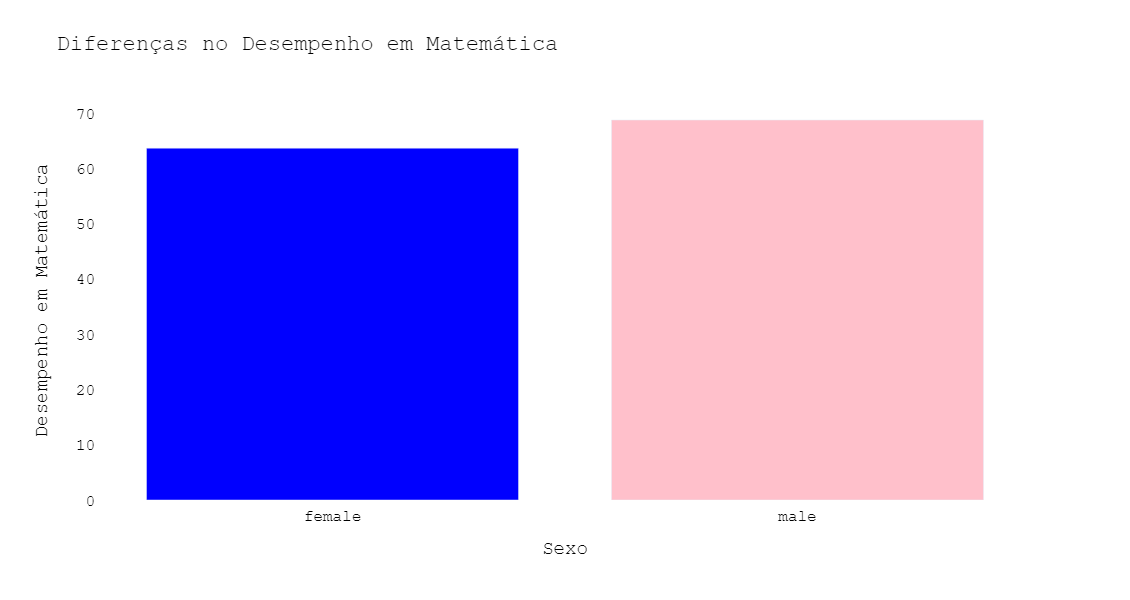

In [24]:
# Seleciona as colunas relevantes
df = df[["math score", "gender"]]

# Remover os valores nulos
df = df.dropna()

# Calcular as médias por sexo
mean_scores = df.groupby("gender")["math score"].mean().reset_index()

# Plotar um gráfico de barras
fig = px.bar(mean_scores, x="gender", y="math score",
             color="gender",
             color_discrete_sequence=["blue", "pink"],
             labels={"gender": "Sexo", "math score": "Desempenho em Matemática"})
fig.update_layout(title="Diferenças no Desempenho em Matemática",
                  font=dict(family="Courier New, monospace", size=16, color="black"),
                  width=800, height=600,
                  autosize=False,
                  margin=dict(l=100, r=100, b=100, t=100, pad=4),
                  plot_bgcolor="white",
                  paper_bgcolor="white",
                  showlegend=False)
fig.show()